## **Import Necessary Libraries**

In [1]:
import numpy as np
from libsvm.svmutil import svm_save_model, svm_load_model, svm_predict
from liblinear.liblinearutil import save_model, load_model, predict
import time
import os
import matplotlib.pyplot as plt

## **Import Functions from train.py**

In [2]:
from train import get_data, spatial_frequency_feature_fusion, prepare_data, train_model, train_linear_model, visualize

## **Run this for preprocessing**

- must include /utils
- example path: "/Users/Danniel/Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data/utils"

In [ ]:
import sys
# path of the folder "Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data"
sys.path.append("/Users/Danniel/Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data/utils")

from preprocessing_save import load_image, save_image

# directory for reading
img_real = "/Users/Danniel/Downloads/Datasets/Low Dataset/real"
img_gan = "/Users/Danniel/Downloads/Datasets/Low Dataset/gan"

# directory for saving (must be an empty folder)
save_dir_real = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_real"
save_dir_gan = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_gan"

# store the images
image_real = load_image(img_real)
image_gan = load_image(img_gan)

save_image(image_real, save_dir_real)
save_image(image_gan, save_dir_gan)

## **Provide directory for Preprocessed Real and GAN-Generated Images**

In [3]:
real_directory = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_real"
gan_directory = "/Users/Danniel/Downloads/Datasets/Low Dataset/p_gan"

## *"get_data" function will load the preprocessed images from the directory and store it in a list*

In [4]:
# run data preparation
real_data = get_data(real_directory)
gan_data = get_data(gan_directory)

Preprocessed Images:  100
Preprocessed Images:  100


## *Run to perform the proposed "spatial frequency feature fusion" method to extract meaningful features of an image to classify whether it is GAN-Generated or Real. The feature vector of each image will be stored in "fused_features" list*

In [5]:
# run feature extraction & feature fusion
extracted_real = spatial_frequency_feature_fusion(real_data)
extracted_gan = spatial_frequency_feature_fusion(gan_data)

Performing Feature Extraction
Applying Local Binary Pattern



[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0  30  62 ... 251 249   0]
 [  0  30  60 ... 249  56   0]
 [  0   0   0 ...   0   0   0]]

1 out of 100 images
Percentage: 1.0




[[  0   0   0 ...   0   0   0]
 [  0 255 227 ... 235 193   0]
 [  0 255 227 ... 231 255   0]
 ...
 [  0 254 124 ... 120 248   0]
 [  0 252 124 ...  56  56   0]
 [  0   0   0 ...   0   0   0]]

2 out of 100 images
Percentage: 2.0




[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 251   0]
 [  0 255 239 ... 255 255   0]
 ...
 [  0 128 135 ... 255 239   0]
 [  0 199 199 ... 239 199   0]
 [  0   0   0 ...   0   0   0]]

3 out of 100 images
Percentage: 3.0




[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 239   0]
 [  0 255 124 ... 207 135   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]

4 out of 100 images
Percentage: 4.0




[[  0

## **For Data Visualization**
- provide real and gan parameter

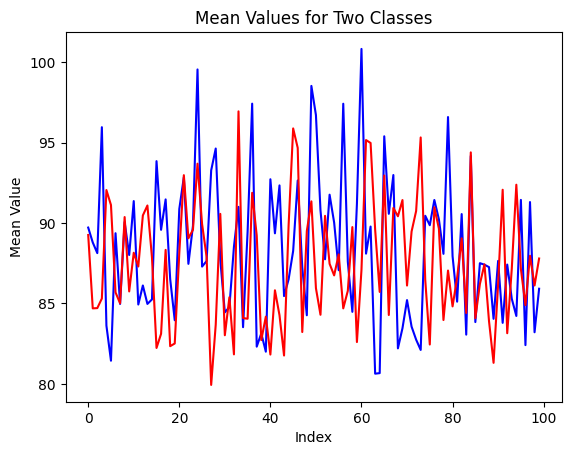

([89.71814346313477,
  88.79226684570312,
  88.12809944152832,
  95.96125411987305,
  83.61817359924316,
  81.43582916259766,
  89.36653327941895,
  84.96784973144531,
  90.05837631225586,
  88.01250648498535,
  91.36550521850586,
  84.932861328125,
  86.11597633361816,
  84.96833419799805,
  85.24837493896484,
  93.84932899475098,
  89.5782241821289,
  91.4698429107666,
  86.51714134216309,
  83.95345497131348,
  90.87347412109375,
  92.85102272033691,
  87.46109390258789,
  89.83029174804688,
  99.55319595336914,
  87.29018592834473,
  87.63705825805664,
  93.27667999267578,
  94.63398551940918,
  87.72239112854004,
  84.44361877441406,
  84.77492713928223,
  88.53117179870605,
  91.00535202026367,
  83.52200698852539,
  89.47327423095703,
  97.42619132995605,
  82.30986595153809,
  83.13409996032715,
  81.9984302520752,
  92.72357177734375,
  89.36070823669434,
  92.3409366607666,
  85.45669937133789,
  86.49619102478027,
  88.26459884643555,
  92.64666175842285,
  87.24187088012695

In [6]:
# visualize
visualize(extracted_real, extracted_gan)

## **Data Preparation before feeding to the classifier**
- assigning of labels
- flattening of feature vector

In [7]:
# prepare the data
labels, datasets = prepare_data(extracted_real, extracted_gan)
print(labels, datasets)

----------------------------Preparing the Data-------------------------------

Labels:  200
Datasets:  200
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([ 0,  0,  0, ..., 95, 32,  0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array(

## **Run this cell if you want to store the data in txt**
- it can be useful for storing training data to avoid repetition of process

**Suggested format**
- train_labels.txt
- train_features.txt
   

In [ ]:
# Save the data
np.savetxt("/Users/User/Desktop/txtfiles/train_labels.txt", labels)
np.savetxt("/Users/User/Desktop/txtfiles/train_features.txt", datasets)

**Load the data**

In [ ]:
# Load the data
loaded_labels = np.loadtxt("/Users/User/Desktop/txtfiles/train_labels.txt")
loaded_features = np.loadtxt("/Users/User/Desktop/txtfiles/train_features.txt")

print("Labels: ", len(loaded_labels))
print("Features: ", len(loaded_features))

## **Model Training**
- LibSVM
- Support Vector Machine
- Linear Kernel


***
    - change the parameter if the data are from loaded text file
    - train_model(loaded_labels, loaded_features)

In [ ]:
# train the data
model = train_model(labels, datasets, C=1)

## **Model Training**
- Liblinear


***
    - change the parameter if the data are from loaded text file
    - train_model(loaded_labels, loaded_features)

In [8]:
# train the data
model = train_linear_model(labels, datasets, C=1)

----------------------Model Training in LibSVM--------------------------



## **Run this when you train the model in liblinear**

In [ ]:
import pickle
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

clf = SVC(loss='hinge', C=1)

model = clf.fit(loaded_features, loaded_labels)

platt = CalibratedClassifierCV(clf, method='sigmoid')
prob_estimates = platt.fit(loaded_features, loaded_labels)

# change the filename with directory
with open('/Users/Danniel/Downloads/Model/platt_scale.pkl', 'wb') as model_file:
    pickle.dump(prob_estimates, model_file)

## **Save the model using ".model" extension**

In [ ]:
# save the model
model_file = "/Users/User/Desktop/model/updatedobjects_new.model"
svm_save_model(model_file, model)

## **Load the model***
- use "load_model" if model is trained in liblinear
- use "svm_load_model" if model is trained in libsvm

In [ ]:
model_file = svm_load_model("/Users/User/Desktop/model/updatedobjects_new.model")

## **Model Testing**
- provide directory (folder) for testing datasets

## *Testing Combined GAN and Real Images*
- use "predict" if model is trained in liblinear
- use "svm_predict" if model is trained in libsvm

In [ ]:
from preprocessing import preprocessing
import os
import numpy as np
from train import spatial_frequency_feature_fusion

# test the model
def get_test_data(directory):
    images = []

    # load the images and store in images list
    for filename in os.listdir(directory):
        image = os.path.join(directory, filename)
        if image is not None:
            images.append(image)

    # preprocessing
    preprocessed_img = []
    for i in images:
        preprocessed_img.append(preprocessing(i))   

    # flatten the feature vector
    fused_features = spatial_frequency_feature_fusion(preprocessed_img)
    labels = np.ones((len(fused_features), 1)) 
    true_label = labels.reshape(labels.shape[0])

    feature_vector = []
    for i in fused_features:
        print(i)
        feature_vector.append(i.flatten())


    return feature_vector


def prepare_test_data(real, gan):
    print("\n\n-------------------PREPARING TEST DATA----------------------------\n")
    #label real  and gan datasets
    real_label = np.ones((len(real), 1))
    gan_label = np.zeros((len(gan), 1))

    # combine the labels and datasets
    dataset_labels = np.vstack((real_label, gan_label))
    datasets = np.vstack((real, gan))

    feature_vector = [i.flatten() for i in datasets]
    true_label = dataset_labels.reshape(dataset_labels.shape[0])

    return feature_vector, true_label


def predict(feature_vector, true_label, model):  
    # predict the result
    print("\n\n-------------------THE MODEL IS PREDICTING----------------------------\n")
    predicted_labels, _, likelihood = svm_predict(true_label, feature_vector, model, '-b 1')


    print("------------------------------------------RESULT-----------------------------------\n")
    result = []
    for i in predicted_labels:
        if i == 1.0:
            result.append("Real")
        elif i == 0.0:
            result.append("GAN")

    
    print(predicted_labels)
    print(result)



while True:
    option = input("Does your data came from text file? (y/n)")

    if option.lower() == "y":
        # mode prediction
        predict(loaded_features, loaded_labels, model_file)
        break

    elif option.lower() == "n":           
        #provide directory for testing dataset
        dir_real = "/Users/User/Desktop/real test/real test objects"
        dir_gan = "/Users/User/Desktop/gan test/gan test objects"

        # undergo spatial-frequency-feature fusion
        real = get_test_data(dir_real)
        gan = get_test_data(dir_gan)

        # combine the real and gan data
        features, labels = prepare_test_data(real, gan)

        # model prediction
        predict(features, labels, model_file)
        break
    
    else:
        print("Invalid Input")

###########################################################################################################################################
# existing_model_file = "/Users/Danniel/Downloads/sample.model"
# existing_model = svm_load_model(existing_model_file)

# # New data
# new_labels = np.array(new_labels)
# new_datasets = np.array(new_datasets)

# # Train or update the model incrementally
# updated_model = train_model(existing_model, new_labels, new_datasets)

# # Save the updated model
# model_file = "/Users/Danniel/Downloads/updated_model.model"
# svm_save_model(model_file, updated_model)

# # Use the updated model for prediction
# image_directory = "/Users/Danniel/Downloads/Low Dataset/test"
# images = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
# predict(updated_model, images)
########################################################################################################################################

## *Testing One Class of Image only*
- use "predict" if model is trained in liblinear
- use "svm_predict" if model is trained in libsvm

In [ ]:
from preprocessing import preprocessing
import os
import numpy as np
from train import spatial_frequency_feature_fusion

# test the model
def get_test_data(directory):
    images = []

    # load the images and store in images list
    for filename in os.listdir(directory):
        image = os.path.join(directory, filename)
        if image is not None:
            images.append(image)

    # preprocessing
    preprocessed_img = []
    for i in images:
        preprocessed_img.append(preprocessing(i))   

    # flatten the feature vector
    fused_features = spatial_frequency_feature_fusion(preprocessed_img)
    labels = np.ones((len(fused_features), 1)) 
    true_label = labels.reshape(labels.shape[0])

    feature_vector = []
    for i in fused_features:
        print(i)
        feature_vector.append(i.flatten())


    return feature_vector


def prepare_test_data(gan):
    print("\n\n-------------------PREPARING TEST DATA----------------------------\n")
    #label real  and gan datasets
    #real_label = np.ones((len(real), 1))
    gan_label = np.zeros((len(gan), 1))

    # combine the labels and datasets
    #dataset_labels = np.vstack((real_label, gan_label))
    #datasets = np.vstack((real, gan))

    feature_vector = [i.flatten() for i in gan]
    true_label = gan_label.reshape(gan_label.shape[0])

    return feature_vector, true_label


def predict(feature_vector, true_label, model):  
    # predict the result
    print("\n\n-------------------THE MODEL IS PREDICTING----------------------------\n")
    predicted_labels, _, likelihood = svm_predict(true_label, feature_vector, model, '-b 1')


    print("------------------------------------------RESULT-----------------------------------\n")
    result = []
    for i in predicted_labels:
        if i == 1.0:
            result.append("Real")
        elif i == 0.0:
            result.append("GAN")

    
    print(predicted_labels)
    print(result)



while True:
    option = input("Does your data came from text file? (y/n)")

    if option.lower() == "y":
        # mode prediction
        predict(loaded_features, loaded_labels, model_file)
        break

    elif option.lower() == "n":           
        #provide directory for testing dataset
        #dir_real = "/Users/User/Desktop/real test/real test objects"
        dir_gan = "/Users/User/Desktop/gan test/gan test objects"

        # undergo spatial-frequency-feature fusion
        #real = get_test_data(dir_real)
        gan = get_test_data(dir_gan)

        # combine the real and gan data
        features, labels = prepare_test_data(gan)

        # model prediction
        predict(features, labels, model_file)
        break
    
    else:
        print("Invalid Input")

###########################################################################################################################################
# existing_model_file = "/Users/Danniel/Downloads/sample.model"
# existing_model = svm_load_model(existing_model_file)

# # New data
# new_labels = np.array(new_labels)
# new_datasets = np.array(new_datasets)

# # Train or update the model incrementally
# updated_model = train_model(existing_model, new_labels, new_datasets)

# # Save the updated model
# model_file = "/Users/Danniel/Downloads/updated_model.model"
# svm_save_model(model_file, updated_model)

# # Use the updated model for prediction
# image_directory = "/Users/Danniel/Downloads/Low Dataset/test"
# images = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
# predict(updated_model, images)
########################################################################################################################################

## **Store the test data in txt file**

In [ ]:
# Save the data
np.savetxt("/Users/User/Desktop/txtfiles/test_labels.txt", labels)
np.savetxt("/Users/User/Desktop/txtfiles/test_features.txt", features)